## K-Nearest Neighbor

- K-Nearest Neighbors (KNN) is a versatile and simple supervised learning algorithm used for both classification and regression tasks. 
- It is a non-parametric and instance-based algorithm, meaning it doesn't make assumptions about the underlying data distribution and makes predictions based on the entire training dataset rather than a learned model.
- The crucial hyperparameter in KNN is "k," which represents the number of neighbors to consider. The choice of k can significantly impact the model's performance.

#### *K Value should be not so high or not very low but in mean.  Universal K Value is 3*

## Approach
#### These steps outline the process to be followed when working on a predictive model: 
- Problem Definition
- Data Collection
- Data Preprocessing
- Feature Selection/Engineering
- Data Splitting
- Model Selection
- Model Training
- Prediction
- Hyperparameter Tuning
- Model Evaluation



## Problem Definition

### *Clearly state the problem you want to solve, as well as the outcome you want to predict.*


Here we have to predict the type of flower using pitel width, height etc.

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Collection

### *Gather relevant data that will be used to train and test the prediction model.*


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Data Preprocessing


### *Clean the data by handling missing values, dealing with outliers, data visualization, normalizing features, and encoding categorical variables.*


In [9]:
df['Species'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Feature Selection/Engineering

### *Identify which features are important for the prediction task and create new features if needed.*


In [10]:
# Creating X and y
X = df.drop(["target" , "Species"] , axis = 'columns')
y = df.target

## Data Splitting

### *Divide the datasets into a training set and a testing set to evaluate your model's performance.*

In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

## Model Selection

### *Choose an appropriate machine learning algorithm based on the type of problem (classification, regression, etc.) and the characteristics of the data.*

In [12]:
from sklearn.neighbors import KNeighborsClassifier 

In [13]:
model = KNeighborsClassifier(n_neighbors=5)

## Model Training

### *Use the training data to train the selected model by adjusting its parameters to minimize the prediction error.*

In [14]:
model.fit(X_train , y_train)

KNeighborsClassifier()

## Prediction

### *Once the model is trained and validated, it can be used to make predictions on new, unseen data.*


In [15]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [16]:
model.score(X_test,y_test)

1.0

## Hyperparameter Tuning

### *Fine-tune the model's hyperparameters to optimize its performance.*


No Need !!!

## Model Evaluation

### *Assess the model's performance on a separate set of data not used during training to understand its predictive power and generalization capability.*



In [17]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test , y_pred)

Text(95.72222222222221, 0.5, 'Truth')

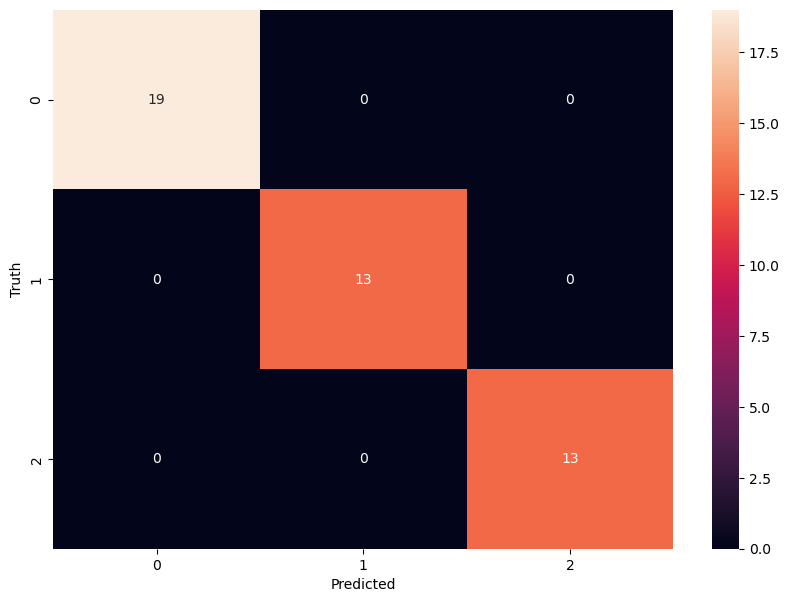

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat , annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [19]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Thank You !!!